In [1]:
from nilearn.interfaces.bids import get_bids_files
from nilearn.interfaces.fmriprep import load_confounds_strategy

import pandas as pd

In [2]:
fmriprep_dir = 'data/julia2018/derivatives/fmriprep_2020'

img_files = get_bids_files(
    fmriprep_dir,
    file_tag='bold',
    modality_folder='func',
    filters=[('ses', 'rest'),
                ('space', 'MNI152NLin2009cAsym'),
                ('desc', 'preproc')],
    file_type='nii.gz')

# BRAIN MASKS
mask_files = get_bids_files(
    fmriprep_dir,
    file_tag='mask',
    modality_folder='func',
    filters=[('ses', 'rest'),
                ('space', 'MNI152NLin2009cAsym'),
                ('desc', 'brain')],
    file_type='nii.gz')

confounds, sample_masks = load_confounds_strategy(img_files, 'simple')

In [5]:
# Import dictionary learning algorithm from decomposition module and call the
# object and fit the model to the functional datasets
from nilearn.decomposition import DictLearning, CanICA

n_components = 60

# Initialize DictLearning object
reducer = DictLearning(
    n_components=n_components,
    verbose=1,
    n_jobs=-1,
    mask_strategy='epi',
    memory='tmp/nilearn_cache', memory_level=10)

# reducer = CanICA(
#     # mask_img_=mask_files,
#     n_components=8,
#     verbose=2,
#     n_jobs=-1,
#     mask_strategy='epi',
#     memory='tmp/nilearn_cache', memory_level=2)

# Fit to the data
reducer.fit(img_files)
# Resting state networks/maps in attribute `components_img_`
components_img = reducer.components_img_

# Visualization of functional networks
# Show networks using plotting utilities
# from nilearn import plotting

# plotting.plot_prob_atlas(components_img, view_type='filled_contours',
#                          title='Components')

score = reducer.score(img_files)

[MultiNiftiMasker.fit] Loading data from [data/julia2018/derivatives/fmriprep_2020/sub-AVGP01/ses-rest/func/sub-AVGP01_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AVGP02/ses-rest/func/sub-AVGP02_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AVGP03/ses-rest/func/sub-AVGP03_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AVGP04/ses-rest/func/sub-AVGP04_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AVGP05/ses-rest/func/sub-AVGP05_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AVGP08/ses-rest/func/sub-AVGP08_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AVGP10/ses-rest/fun

/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,


[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signal

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.89s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.90s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provid

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.68s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.70s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provid

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('data/julia2018/derivatives/fmriprep_2020/sub-AVGP16NEW/ses-rest/func/sub-AVGP16NEW_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('data/julia2018/derivatives/fmri

/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:87: UserWarning: Persisting input arguments took 0.52s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  imgs = cache(
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:87: UserWarning: Persisting input arguments took 0.53s to run.
If this happens often in your code, it can cause

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,


[MultiNiftiMasker.transform_single_imgs] Extracting region signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.95s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,


[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,


[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.63s to run.
If th

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,


[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.76s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.73s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provid

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('data/julia2018/derivatives/fmriprep_2020/sub-NVGP13/ses-rest/func/sub-NVGP13_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.73s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provid

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provid

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('data/julia2018/derivatives/fmriprep_2020/sub-NVGP14/ses-rest/func/sub-NVGP14_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('data/julia2018/derivatives/fmriprep_2020/sub-NVGP15/ses-rest/func/sub-NVGP15_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('data/julia2018/derivatives/fmriprep_2020/sub-NVGP16/ses-rest/func/sub-NVGP16_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform

/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,


[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,


[MultiNiftiMasker.transform_single_imgs] Extracting region signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.62s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,


[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,


[MultiNiftiMasker.transform_single_imgs] Extracting region signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.51s to run.
If th

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.67s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for function 'nifti_masker_extractor'
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: JobLibCollisionWarning: Cannot detect name collisions for functi

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.71s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,


[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,


[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, aux = cache(extraction_function, memory,
/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/maskers/base_masker.py:94: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provid

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[DictLearning] Learning initial components
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.007928, ..., -0.018545],
       ...,
       [-0.008817, ...,  0.000259]]), n_components=60, transpose=True, random_state=None, n_iter=3)
___________________________________________________randomized_svd - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(memmap([[ 0.002626, ..., -0.000444],
        ...,
        [ 0.003562, ..., -0.005841]]), whiten=True, fun='cube', random_state=687340408)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


__________________________________________________________fastica - 5.1s, 0.1min
[DictLearning] Computing initial loadings


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.2s finished


________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-8.077740e-04, ...,  1.948998e-03],
       ...,
       [-9.844993e-03, ...,  3.337117e-05]]), 
array([[-8.084915, ..., -8.991358],
       ...,
       [-1.565324, ...,  0.021902]]))


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/decomposition/dict_learning.py:234: UserWarning: Persisting input arguments took 0.58s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  self.loadings_init_ = self._cache(_compute_loadings)(


_________________________________________________compute_loadings - 0.6s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-8.084915, ..., -1.565324],
       ...,
       [-8.991358, ...,  0.021902]]), 
60, alpha=10, n_iter=1319, batch_size=20, method='cd', dict_init=array([[ 0.054626, ..., -0.035061],
       ...,
       [-0.024404, ...,  0.032727]]), verbose=0, random_state=None, return_code=True, shuffle=True, n_jobs=1)


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/decomposition/dict_learning.py:262: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  self.components_, _ = self._cache(dict_learning_online)(


_____________________________________________dict_learning_online - 9.8s, 0.2min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition.base.explained_variance...
explained_variance(array([[-8.084915e+00, ..., -8.991358e+00],
       ...,
       [ 5.596858e-15, ..., -6.654277e-16]]), 
array([[ 0., ...,  0.],
       ...,
       [-0., ...,  0.]]), per_component=False)
______________________________________________explained_variance - 17.2s, 0.3min


/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/decomposition/base.py:502: UserWarning: Persisting input arguments took 1.14s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return self._cache(explained_variance)(data, self.components_,


In [6]:
print(f'{n_components} components; explained variance = {score:.3f}')

60 components; explained variance = 0.264


In [7]:
# Grid Search n_components given explained_variance score

reducer = DictLearning(
    n_components=1,
    verbose=1,
    n_jobs=-1,
    mask_strategy='epi',
    memory='tmp/nilearn_cache', memory_level=2)

scores_lst = []

from IPython.display import clear_output
from tqdm import tqdm

for n_components in tqdm(range(2, 25)):
    clear_output(wait=True)
    print(f'n_components: {n_components}')
    reducer.set_params(n_components=n_components)
    reducer.fit(img_files)
    score = reducer.score(img_files)
    scores_lst.append((n_components, score))

n_components: 24
[MultiNiftiMasker.fit] Loading data from [data/julia2018/derivatives/fmriprep_2020/sub-AVGP01/ses-rest/func/sub-AVGP01_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AVGP02/ses-rest/func/sub-AVGP02_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AVGP03/ses-rest/func/sub-AVGP03_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AVGP04/ses-rest/func/sub-AVGP04_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AVGP05/ses-rest/func/sub-AVGP05_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AVGP08/ses-rest/func/sub-AVGP08_ses-rest_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 data/julia2018/derivatives/fmriprep_2020/sub-AV

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


__________________________________________________________fastica - 0.4s, 0.0min
[DictLearning] Computing initial loadings


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.001759, ..., -0.000672],
       ...,
       [-0.00557 , ..., -0.00467 ]]), 
array([[-8.084915, ..., -8.991358],
       ...,
       [-0.828303, ..., -0.750167]]))
_________________________________________________compute_loadings - 0.2s, 0.0min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[-8.084915, ..., -0.828303],
       ...,
       [-8.991358, ..., -0.750167]]), 
24, alpha=10, n_iter=1319, batch_size=20, method='cd', dict_init=array([[ 0.075411, ...,  0.145465],
       ...,
       [ 0.151423, ..., -0.297322]]), verbose=0, random_state=None, return_code=True, shuffle=True, n_jobs=1)
____________________________________________dict

/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/decomposition/base.py:502: UserWarning: Persisting input arguments took 5.34s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  return self._cache(explained_variance)(data, self.components_,
100%|██████████| 23/23 [15:47<00:00, 41.19s/it]

______________________________________________explained_variance - 34.3s, 0.6min


In [8]:
scores = pd.DataFrame(scores_lst, columns=['n_components', 'score'])
scores

,n_components,score
0,2,0.104687
1,3,0.126673
2,4,0.137580
3,5,0.149462
4,6,0.158405
5,7,0.169673
6,8,0.175327
7,9,0.182994
8,10,0.187430
9,11,0.191965


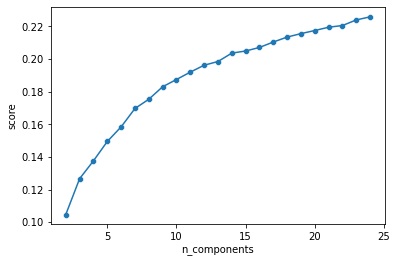

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='n_components', y='score', data=scores)
sns.scatterplot(x='n_components', y='score', data=scores)
plt.show()

In [ ]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(reducer.components_img_,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            threshold=.5,
                            )
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = ('%d regions are extracted from %d components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 8))
plotting.plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

In [ ]:
extractor.transform(img_files[0], confounds[0], sample_masks[0]).shape